# Data Visualisations

## Objectives

* Answer business requirement 1 
    * The client is interested in discovering how the house attributes correlate with the sale price. Therefore, the client expects data visualisations of the correlated variables against the sale price to show that.

## Inputs

* outputs/datasets/collection/house_prices_records.csv

## Outputs

* generate code that answers business requirement 1 by providing most relevant variables that correlate with sale price.
* provide data visualisations for most relevant house atttributes



---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-issues'

# Load Data

In [6]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/house_prices_records.csv"))
df.head(3)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500


---

# Data Exploration

Generate pandas report to gain insights on data, including data types, missing data and distribution.

In [7]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Observations from the pandas report
* The dataset has 24 variables (columns) and 1460 observations (rows)
* Almost 10% of total data is missing - mostly from two variables 'WoodDeckSF' and 'EnclosedPorch'.
* The dataset has 20 numeric variables and 4 categorical variables
* Variable 'WoodDeckSF' and 'EnclosedPorch' have 90.7% and 89.4% missing data respectively. It may be appropriate to drop or impute this data at a later stage. Given the context, it is possible that the reason for the missing data is that the houses did not have a deck and/or a porch, however, this is speculation and the data in that case should have been an entry of 0.
* Variables 'OverallCond' and 'OverallQual' are categorical variables that have been numerically encoded.
* The data for sales price has a positively skewed distribution, with the majority of observations for sales prices in the range $130k to $214k (interquartile range). There is limited sales price data in the range from $350k+. It will be difficult to build a model that can accurately predict sale prices above $350k and this may be a problem for the client if any of their four inherited houses fall in this range. 

---

# Correlation Study

We use one hot encoding to transform two categorical variables into numeric variables that are required for correlation study. Two further categorical variables could not be transformed because they have missing data.

In [12]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=['BsmtExposure', 'KitchenQual'], drop_last=False)
df_ohe = encoder.fit_transform(df) #creates new df with one hot encoded variables
print(df_ohe.shape)
df_ohe.head(3)

(1460, 31)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,GarageYrBlt,...,SalePrice,BsmtExposure_No,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_Av,BsmtExposure_None,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
0,856,854.0,3.0,706,GLQ,150,0.0,548,RFn,2003.0,...,208500,1,0,0,0,0,1,0,0,0
1,1262,0.0,3.0,978,ALQ,284,NaN,460,RFn,1976.0,...,181500,0,1,0,0,0,0,1,0,0
2,920,866.0,3.0,486,GLQ,434,0.0,608,RFn,2001.0,...,223500,0,0,1,0,0,1,0,0,0


We use `.corr()` for `spearman` and investigate the top 10 correlations
* We sort values considering the absolute value, by setting `key=abs`

In [14]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10) 
corr_spearman #slices at 1 to exclude the first element because the correlation is 1 

OverallQual       0.809829
GrLivArea         0.731310
YearBuilt         0.652682
GarageArea        0.649379
TotalBsmtSF       0.602725
GarageYrBlt       0.593788
KitchenQual_TA   -0.581803
1stFlrSF          0.575408
YearRemodAdd      0.571159
KitchenQual_Gd    0.478583
Name: SalePrice, dtype: float64

We use `.corr()` for `pearson` and investigate the top 10 correlations

In [15]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10) 
corr_pearson

OverallQual       0.790982
GrLivArea         0.708624
GarageArea        0.623431
TotalBsmtSF       0.613581
1stFlrSF          0.605852
YearBuilt         0.522897
KitchenQual_TA   -0.519298
YearRemodAdd      0.507101
KitchenQual_Ex    0.504094
GarageYrBlt       0.486362
Name: SalePrice, dtype: float64

* Moderate to strong correlations were noticed with both methods between SalePrice and a given variable.
* We will consider the top five most correlated variables.
* We concatenate the top 5 from spearman and pearson correlataion. 'set' ensures each variable appears only once in the new list.

In [16]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list()) 

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

We now have the top five most important variables for predictinbg house sale price.
* First floor area in square feet
* Garage area in square feet
* Above grade (ground) living area in square feet
* Overall quality of materials and finishes
* Original construction date

In [17]:
vars_to_study = ['1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'] 
vars_to_study

['1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt']

# EDA on selected variables

Create a new dataframe with only selected variables and SalePrice

In [18]:
df_eda = df.filter(vars_to_study + ['SalePrice']) 
df_eda.head(3)

,1stFlrSF,GarageArea,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt,SalePrice
0,856,548,1710,7,856,2003,208500
1,1262,460,1262,6,1262,1976,181500
2,920,608,1786,7,920,2001,223500


## Variables Distribution by Sale Price

* We plot the variables of interest against the SalePrice
* If variable is numerical, plot a scatterplot
* If variable is categorical, plot a bar plot

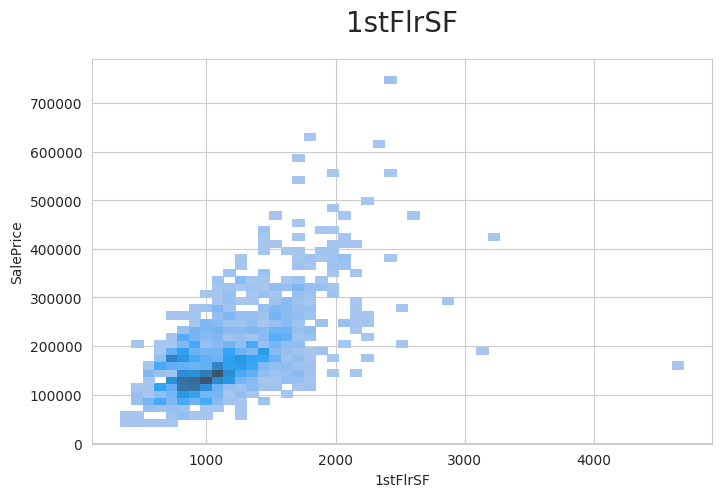

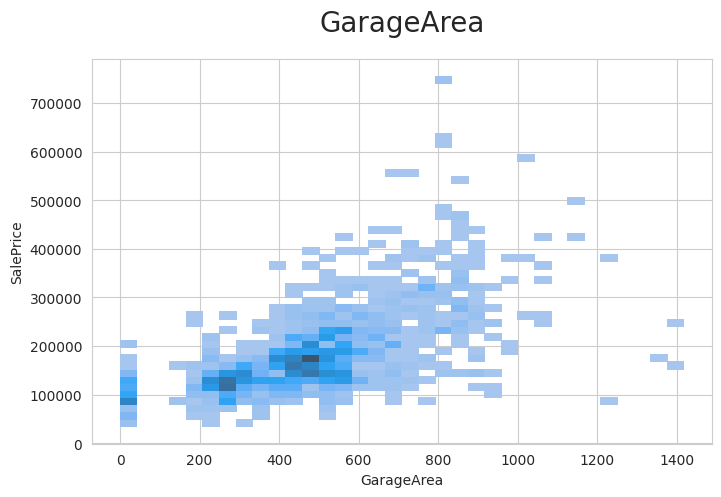

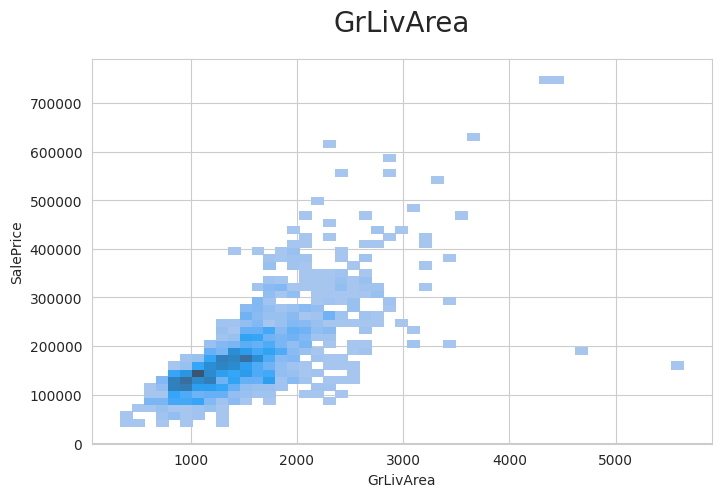

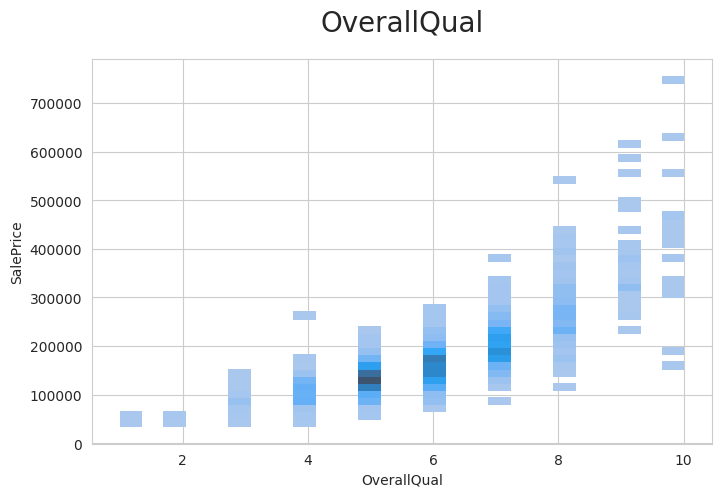

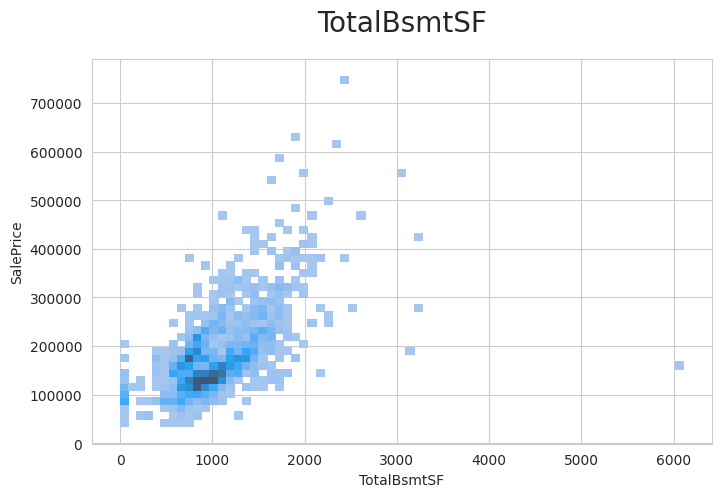

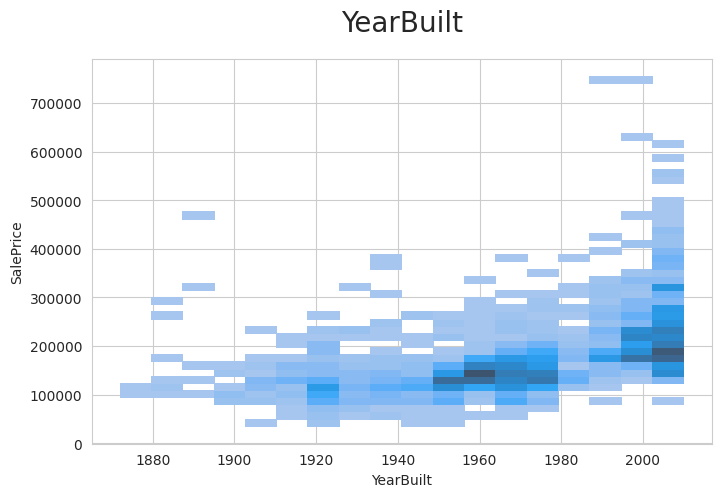

In [22]:
def correlation_to_sale_price_hist(df, vars_to_study):
    """ Display correlation plot between variables and sale price """
    target_var = 'SalePrice'
    for col in vars_to_study:
        fig, axes = plt.subplots(figsize=(8, 5))
        axes = sns.histplot(data=df, x=col, y=target_var)
        plt.title(f"{col}", fontsize=20, y=1.05)
        plt.show()
        print("\n\n")

correlation_to_sale_price_hist(df_eda, vars_to_study)

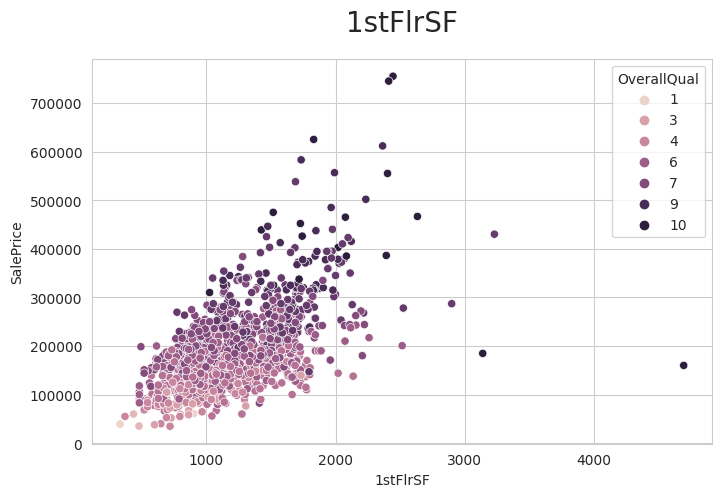

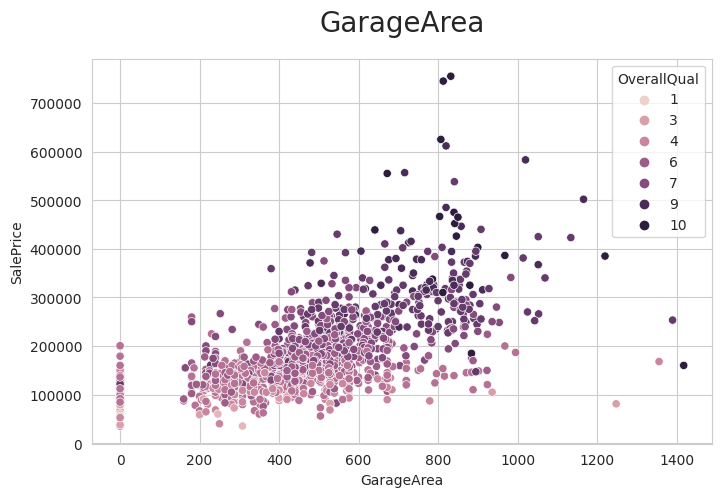

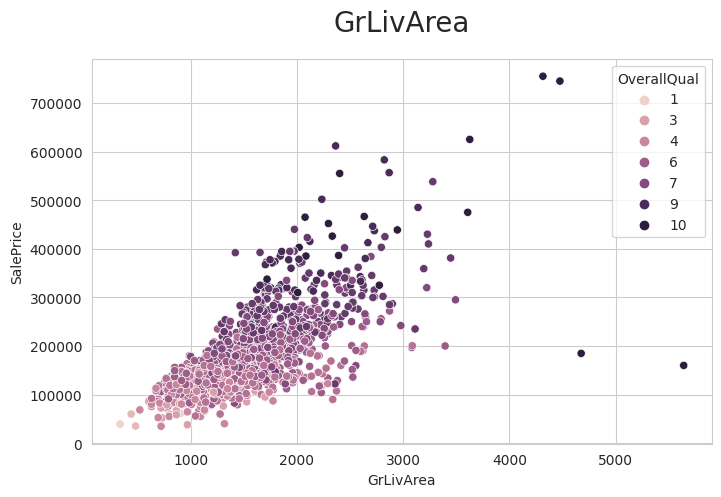

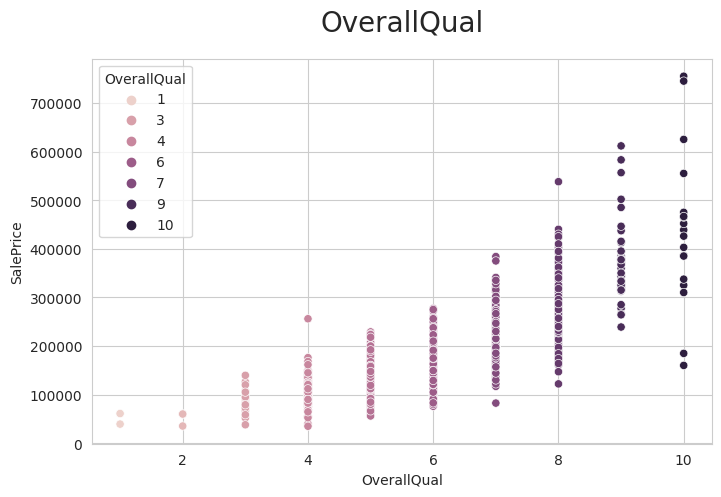

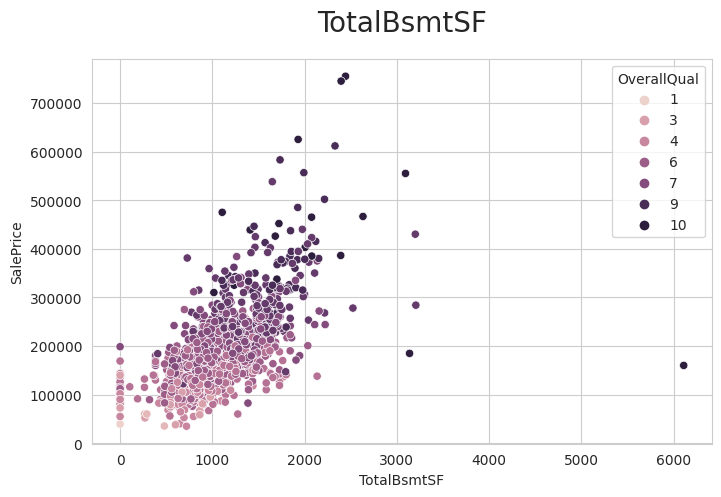

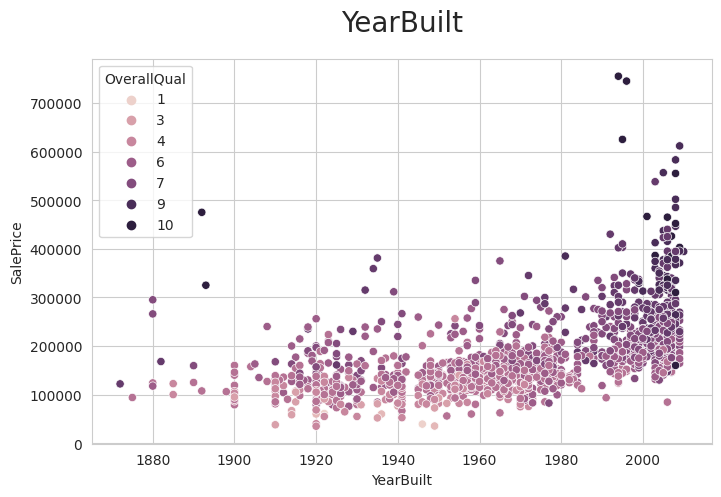

In [23]:
def correlation_to_sale_price_scat(df, vars_to_study):
    """  scatterplots of variables vs SalePrice """
    target_var = 'SalePrice'
    for col in vars_to_study:
        fig, axes = plt.subplots(figsize=(8, 5))
        axes = sns.scatterplot(data=df, x=col, y=target_var, hue='OverallQual')
        plt.title(f"{col}", fontsize=20, y=1.05)
        plt.show()
        print("\n\n")

correlation_to_sale_price_scat(df_eda, vars_to_study)

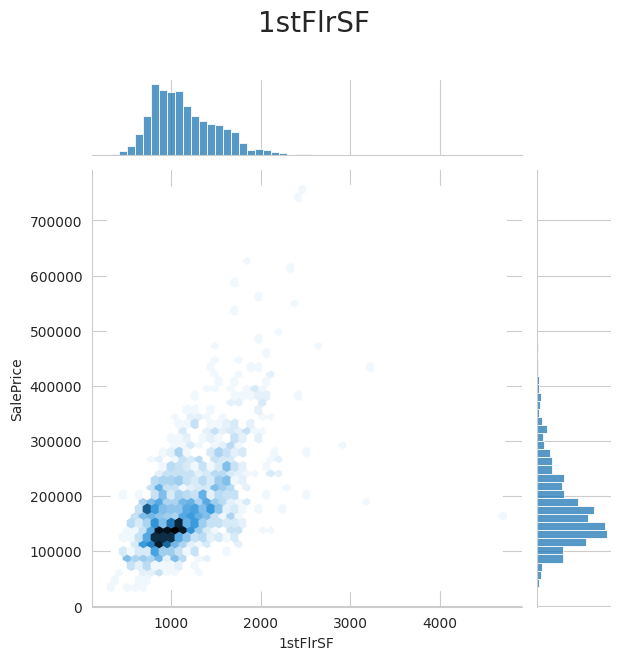

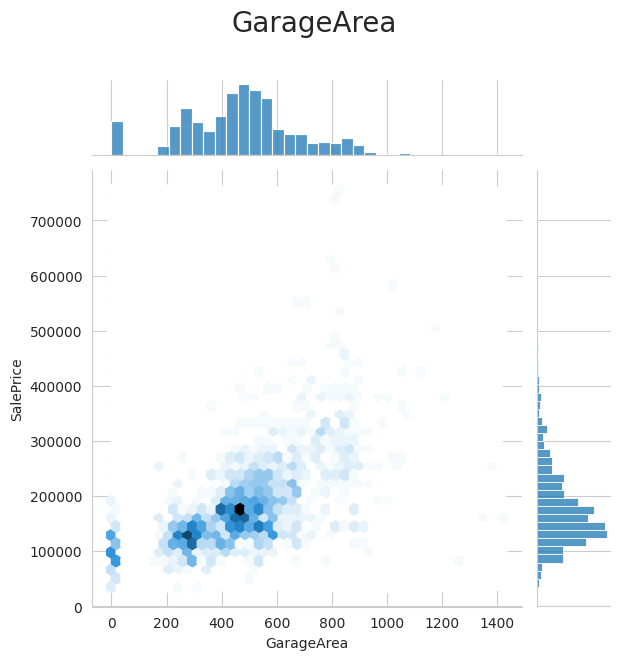

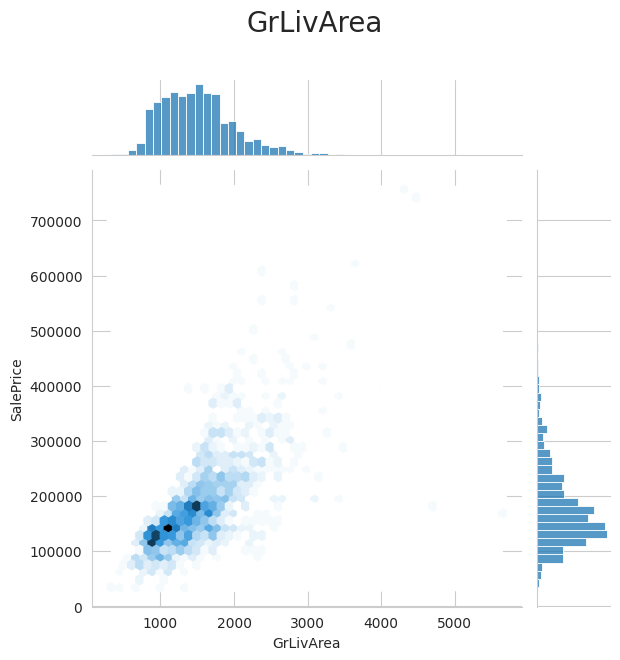

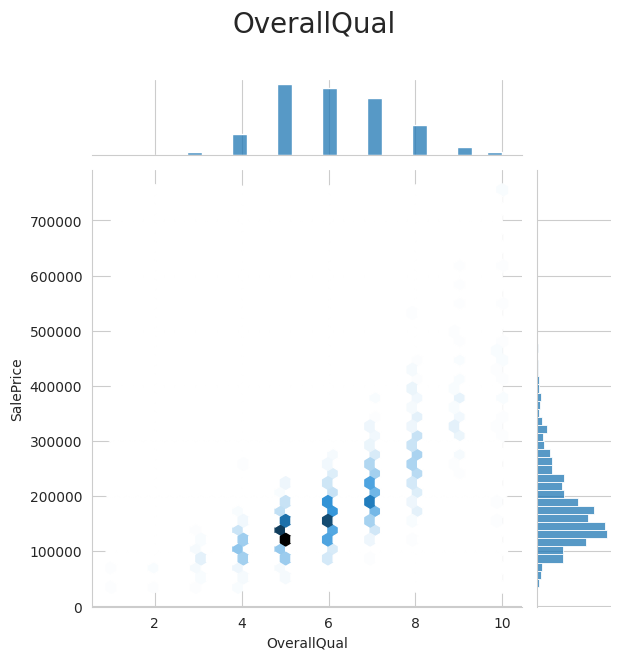

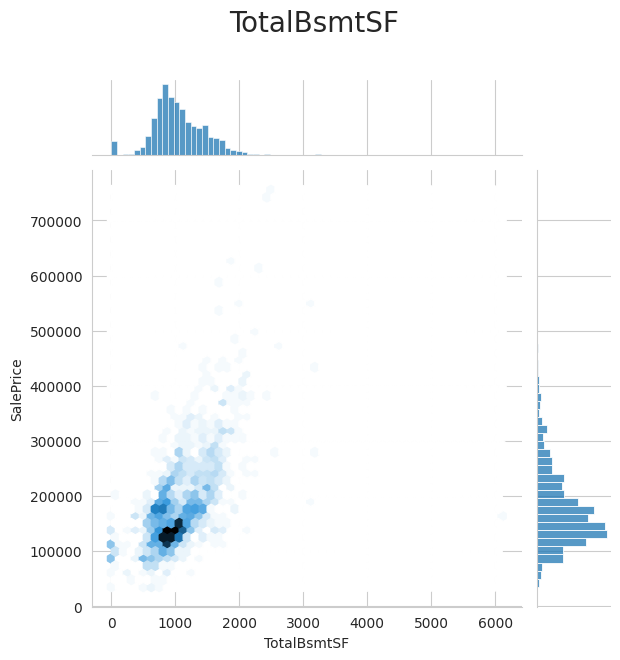

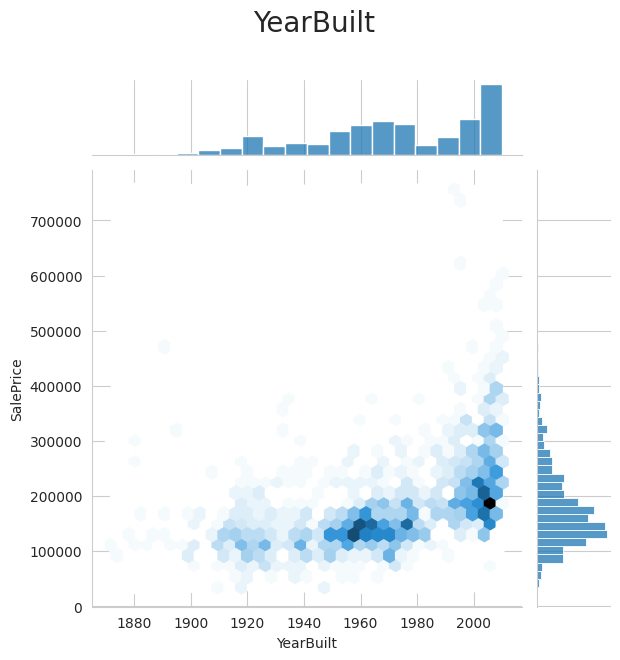

In [24]:
def correlation_to_sale_price_joint(df, vars_to_study):
    """  Joint plots of variables vs SalePrice """
    target_var = 'SalePrice'
    for col in vars_to_study:
        x, y, hue = col, target_var, 'OverallQual'
        sns.jointplot(data=df, x=x, y=y, kind='hex')
        # sns.jointplot(data=df, x=x, y=y, hue=hue)
        plt.title(f"{col}", fontsize=20, y=1.3, x=-3)
        plt.show()
        print("\n\n")


correlation_to_sale_price_joint(df_eda, vars_to_study)

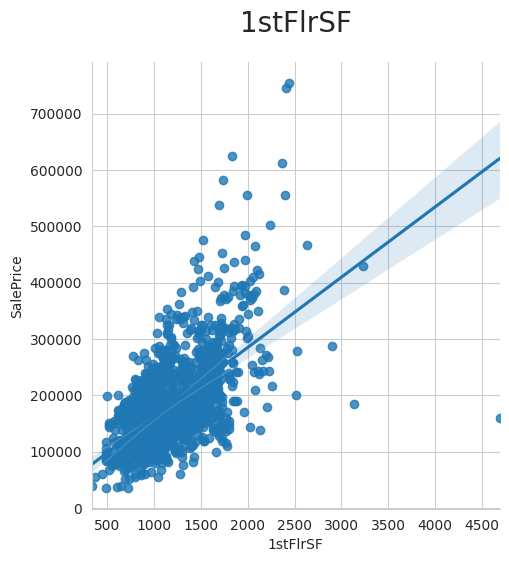

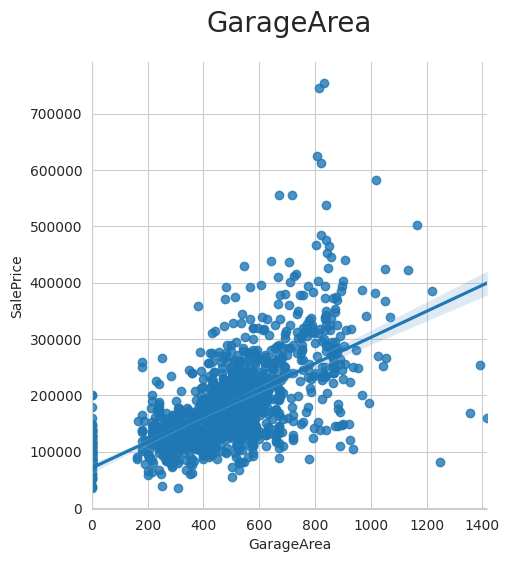

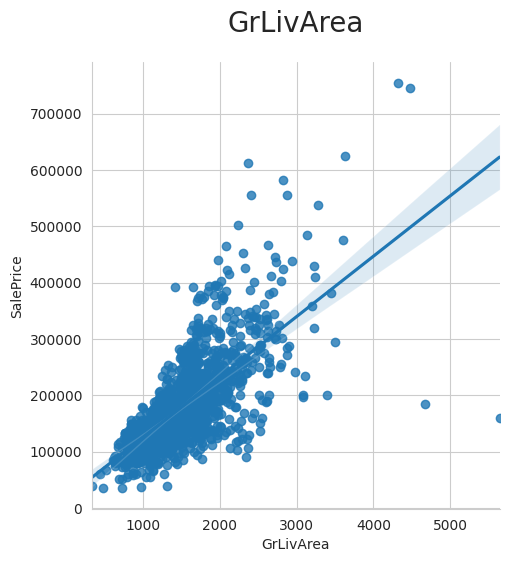

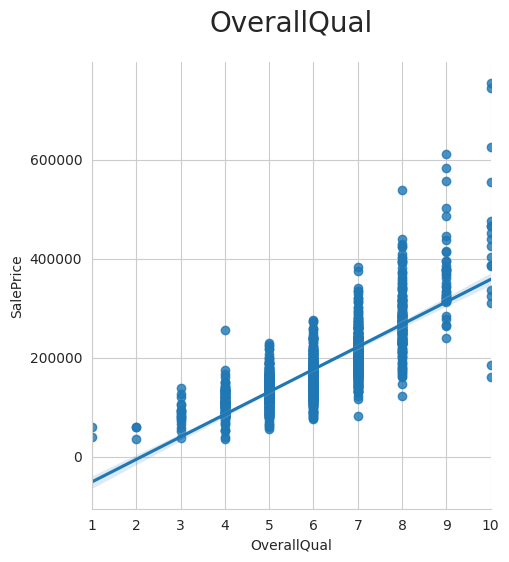

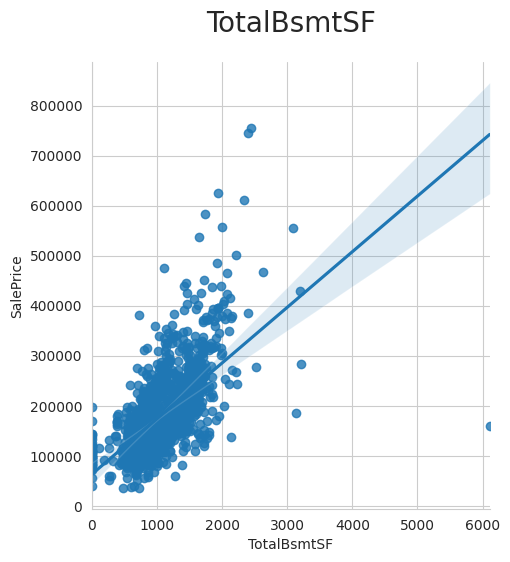

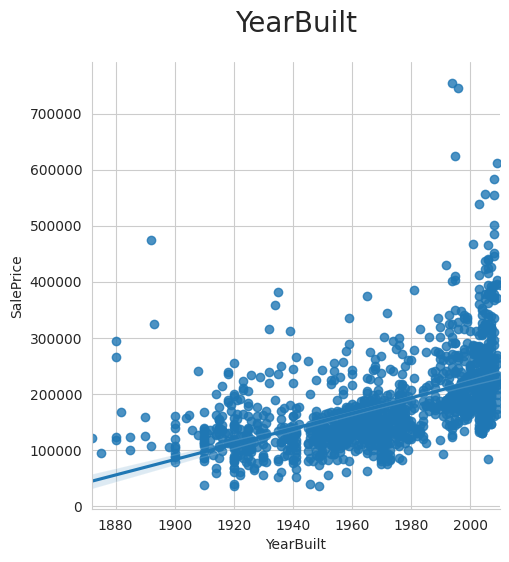

In [25]:
def correlation_to_sale_price_lm(df, vars_to_study):
    """  Joint plots of variables vs SalePrice """
    target_var = 'SalePrice'
    for col in vars_to_study:
        # fig, axes = plt.subplots(figsize=(8, 5))
        sns.lmplot(data=df, x=col, y=target_var)
        plt.title(f"{col}", fontsize=20, y=1.05)
        plt.show()
        print("\n\n")

correlation_to_sale_price_lm(df_eda, vars_to_study)

---

# Push files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)
